Dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import exp
from random import seed , random
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# ***Question-1 (MLP Implementations)***

Dividing Data into Features and Label

In [ ]:
nt = np.genfromtxt('wheat-seeds.txt',delimiter=',')
x = nt[:,:-1]
y = nt[:,-1]

s = StandardScaler()
s.fit(x)
x = s.transform(x)

Describing Dataset according to its features

In [ ]:
df = pd.DataFrame(nt,columns=['Area','Perimeter','Compactness','Kernel-Length','Kernel-Width','Asymmetry-Coefficient','Kernel-Grove','Type'])
df

,Area,Perimeter,Compactness,Kernel-Length,Kernel-Width,Asymmetry-Coefficient,Kernel-Grove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3.0
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3.0
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3.0
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


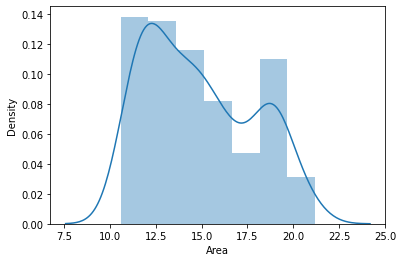

In [ ]:
sns.distplot(df['Area'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


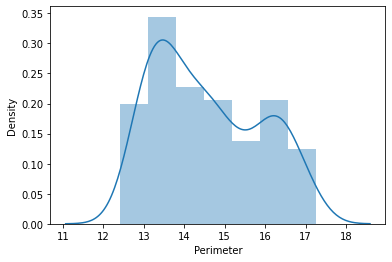

In [ ]:
sns.distplot(df['Perimeter'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


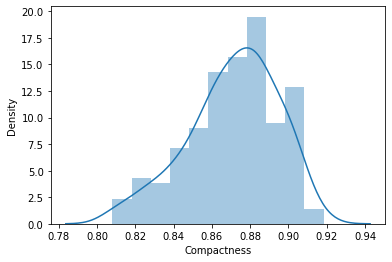

In [ ]:
sns.distplot(df['Compactness'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


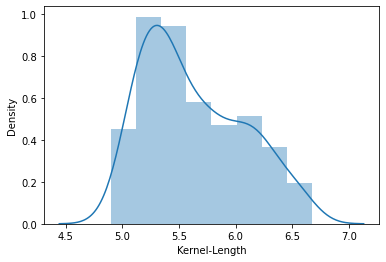

In [ ]:
sns.distplot(df['Kernel-Length'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


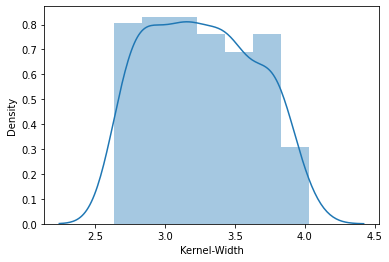

In [ ]:
sns.distplot(df['Kernel-Width'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


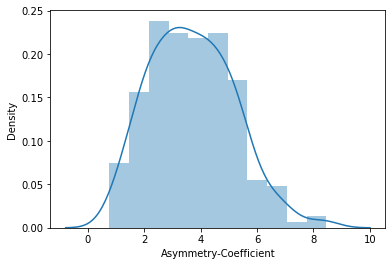

In [ ]:
sns.distplot(df['Asymmetry-Coefficient'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


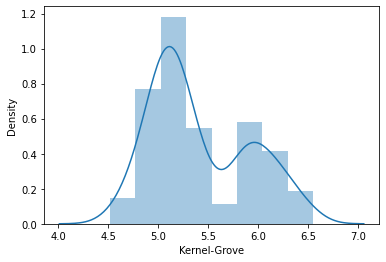

In [ ]:
sns.distplot(df['Kernel-Grove'])

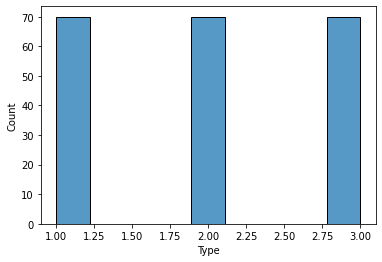

In [ ]:
sns.histplot(df['Type'])

Storing 100 different splits

In [ ]:
splits = []
for i in range(1,100):
  xtr,xte,ytr,yte = train_test_split(x,y,test_size = i/100,shuffle = True,random_state = 42)
  splits.append([xtr,xte,ytr,yte])

### **Multi-Layered Perceptron (Scratch Implementation)**

Initializing Weights

In [ ]:
def initialize_network(n_inputs, n_hidden, n_outputs):
	network = list()
	hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
	network.append(hidden_layer)
	output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
	network.append(output_layer)
	return network

Hypothesis Function

In [ ]:
def hypothesis(weights, inputs):
	hypothesis = weights[-1]
	for i in range(len(weights)-1):
		hypothesis += weights[i] * inputs[i]
	return hypothesis

Sigmoid / Relu / Tanh Activation Functions , with their derivatives

In [ ]:
from math import tanh

def sigmoid(hypothesis):
	return 1.0 / (1.0 + exp((-1)*hypothesis))
 
def relu(hypothesis):
  return max(0,hypothesis)

def tan_h(hypothesis):
  return tanh(hypothesis)

def sigmoid_d(output):
	return output * (1.0 - output)
 
def relu_d(output):
  if output>0:
    return 1
  else:
    return 0

def tanh_d(output):
  return 1-((output)**2)

Forward Progression

In [ ]:
def forward_propagate(network, row, activation = 'relu'):
  inputs = row
  for layer in network:
    new_inputs = []
    for neuron in layer:
      hypo = hypothesis(neuron['weights'], inputs)
      if activation == 'relu':
        neuron['output'] = relu(hypo)
      elif activation == 'sigmoid':
        neuron['output'] = sigmoid(hypo)
      else:
        neuron['output'] = tan_h(hypo)
      new_inputs.append(neuron['output'])
    inputs = new_inputs
  return inputs


Backpropagation Algorithm

In [ ]:
def backward_propagate_error(network, expected,activation = 'relu'):
  for i in reversed(range(len(network))):
    layer = network[i]
    errors = list()
    if i!= len(network)-1:
      for j in range(len(layer)):
        error = 0.0
        for neuron in network[i+1]:
          error += (neuron['weights'][j] * neuron['delta'])
        errors.append(error)
    else:
      for j in range(len(layer)):
        neuron = layer[j]
        errors.append(expected[j] - neuron['output'])
    for j in range(len(layer)):
      neuron = layer[j]
      if activation == 'relu':
        neuron['delta'] = errors[j] * relu_d(neuron['output'])
      elif activation == 'sigmoid':
        neuron['delta'] = errors[j] * sigmoid_d(neuron['output'])
      else:
        neuron['delta'] = errors[j] * tanh_d(neuron['output'])

Weights Update Procedure

In [ ]:
def update_weights(network, row, l_rate):
	for i in range(len(network)):
		inputs = row[:-1]
		if i != 0:
			inputs = [neuron['output'] for neuron in network[i - 1]]
		for neuron in network[i]:
			for j in range(len(inputs)):
				neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
			neuron['weights'][-1] += l_rate * neuron['delta']

Training the Neural Network and then Predicting the outcome

In [ ]:
def train_network(network, train,test, l_rate, n_epoch, n_outputs,activation = 'relu'):
  loss = []
  for epoch in range(n_epoch):
    sum_error = 0
    for row in train:
      outputs = forward_propagate(network,row,activation)
      for j in range(len(outputs)):
        if outputs[j]!= max(outputs):
          outputs[j] = 0
        else:
          outputs[j] = 1
      expected = [0 for i in range(n_outputs)]
      expected[int(row[-1])-1] = 1
      sum_error += sum([(expected[ii]-outputs[ii])**2 for ii in range(0,len(expected))])
      backward_propagate_error(network, expected,activation)
      update_weights(network,row,l_rate)
    loss.append(sum_error)
  pred=[]
  for row in test:
    outputs = forward_propagate(network,row,activation)
    pred.append(outputs.index(max(outputs))+1)
  return min(loss)/len(train),pred

Implementation on Wheat Seed Dataset

In [ ]:
seed(1)
scores_s_r = []
best_loss_r = []
for i in range(len(splits)):
  network1 = initialize_network(x.shape[1],1,3)
  training = np.column_stack((splits[i][0],splits[i][2])).tolist()
  loss1,pred1 = train_network(network1,training,splits[i][1],0.001,1000,3,'relu')
  scores_s_r.append(accuracy_score(splits[i][3],pred1)*100)
  best_loss_r.append(loss1)

In [ ]:
seed(1)
scores_s_s = []
best_loss_s = []
for i in range(len(splits)):
  network2 = initialize_network(x.shape[1],1,3)
  training = np.column_stack((splits[i][0],splits[i][2])).tolist()
  loss2,pred2 = train_network(network2,training,splits[i][1],0.001,1000,3,'sigmoid')
  scores_s_s.append(accuracy_score(splits[i][3],pred2)*100)
  best_loss_s.append(loss2)

In [ ]:
seed(1)
scores_s_t = []
best_loss_t = []
for i in range(len(splits)):
  network3 = initialize_network(x.shape[1],1,3)
  training = np.column_stack((splits[i][0],splits[i][2])).tolist()
  loss3,pred3 = train_network(network3,training,splits[i][1],0.001,1000,3,'tanh')
  scores_s_t.append(accuracy_score(splits[i][3],pred3)*100)
  best_loss_t.append(loss3)

### **Multi-Layered Perceptron (Sklearn's Implementation)**

In [ ]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

scores_sk_r = []
best_loss_sk_r = []
for j in range(len(splits)):
  model1 = MLPClassifier(solver='sgd',nesterovs_momentum=False,max_iter=1000,learning_rate_init=0.001,hidden_layer_sizes=(7,),activation='relu',alpha = 0,power_t = 0,momentum=0)
  model1.fit(splits[j][0],splits[j][2])
  scores_sk_r.append(model1.score(splits[j][1],splits[j][3])*100)
  best_loss_sk_r.append(model1.best_loss_)

In [ ]:
scores_sk_s = []
best_loss_sk_s = []
for j in range(len(splits)):
  model2 = MLPClassifier(solver='sgd',nesterovs_momentum=False,max_iter=1000,learning_rate_init=0.001,hidden_layer_sizes=(7,),activation='logistic',alpha = 0,power_t = 0,momentum=0)
  model2.fit(splits[j][0],splits[j][2])
  scores_sk_s.append(model2.score(splits[j][1],splits[j][3])*100)
  best_loss_sk_s.append(model2.best_loss_)

In [ ]:
scores_sk_t = []
best_loss_sk_t = []
for j in range(len(splits)):
  model3 = MLPClassifier(solver='sgd',nesterovs_momentum=False,max_iter=1000,learning_rate_init=0.001,hidden_layer_sizes=(7,),activation='tanh',alpha = 0,power_t = 0,momentum=0)
  model3.fit(splits[j][0],splits[j][2])
  scores_sk_t.append(model3.score(splits[j][1],splits[j][3])*100)
  best_loss_sk_t.append(model3.best_loss_)

Necessary Plots for comparing Scratch and Sklearn's Implementations

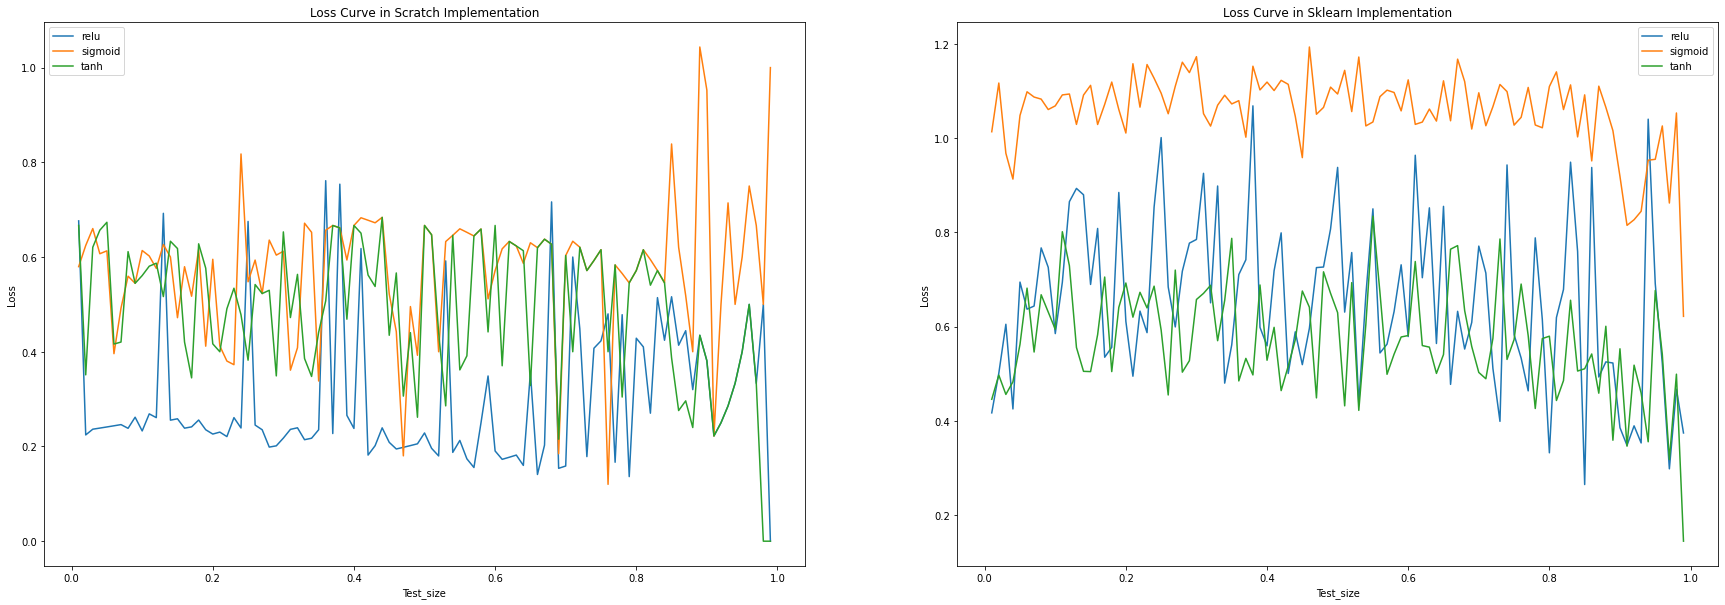

In [ ]:
f = plt.figure(figsize=(30,10))

ax = f.add_subplot(121)
plt.plot([i/100 for i in range(1,100)],best_loss_r)
plt.plot([i/100 for i in range(1,100)],best_loss_s)
plt.plot([i/100 for i in range(1,100)],best_loss_t)
plt.xlabel('Test_size')
plt.ylabel('Loss')
plt.legend(labels = ['relu','sigmoid','tanh'])
plt.title('Loss Curve in Scratch Implementation')

ax = f.add_subplot(122)
plt.plot([i/100 for i in range(1,100)],best_loss_sk_r)
plt.plot([i/100 for i in range(1,100)],best_loss_sk_s)
plt.plot([i/100 for i in range(1,100)],best_loss_sk_t)
plt.xlabel('Test_size')
plt.ylabel('Loss')
plt.legend(labels = ['relu','sigmoid','tanh'])
plt.title('Loss Curve in Sklearn Implementation')

plt.show()

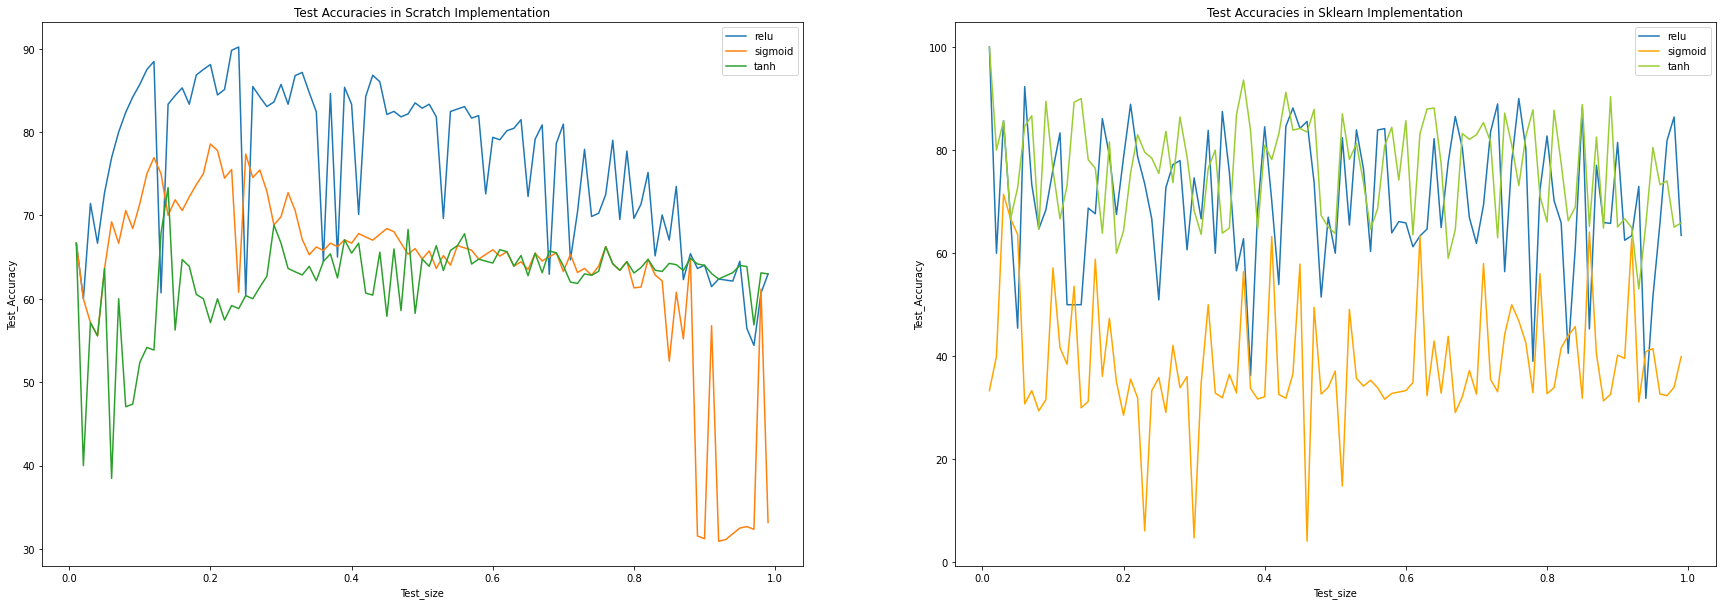

In [ ]:
f = plt.figure(figsize=(30,10))

ax = f.add_subplot(121)
plt.plot([i/100 for i in range(1,100)],scores_s_r)
plt.plot([i/100 for i in range(1,100)],scores_s_s)
plt.plot([i/100 for i in range(1,100)],scores_s_t)
plt.xlabel('Test_size')
plt.ylabel('Test_Accuracy')
plt.legend(labels = ['relu','sigmoid','tanh'])
plt.title('Test Accuracies in Scratch Implementation')

ax = f.add_subplot(122)
plt.plot([i/100 for i in range(1,100)],scores_sk_r)
plt.plot([i/100 for i in range(1,100)],scores_sk_s,color = 'orange')
plt.plot([i/100 for i in range(1,100)],scores_sk_t,color = 'yellowgreen')
plt.xlabel('Test_size')
plt.ylabel('Test_Accuracy')
plt.legend(labels = ['relu','sigmoid','tanh'])
plt.title('Test Accuracies in Sklearn Implementation')

plt.show()

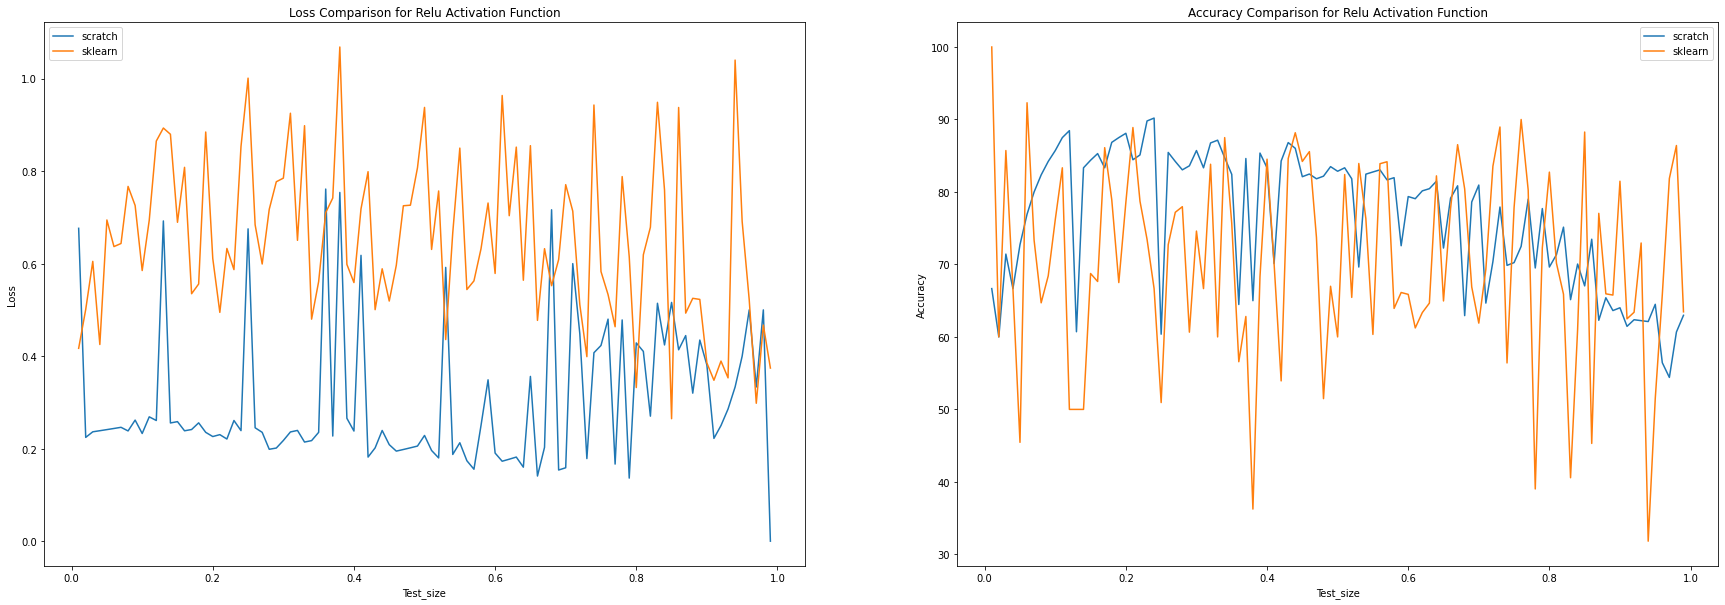

In [ ]:
f = plt.figure(figsize=(30,10))

ax = f.add_subplot(121)
plt.plot([i/100 for i in range(1,100)],best_loss_r)
plt.plot([i/100 for i in range(1,100)],best_loss_sk_r)
plt.xlabel('Test_size')
plt.ylabel('Loss')
plt.legend(labels = ['scratch','sklearn'])
plt.title('Loss Comparison for Relu Activation Function')

ax = f.add_subplot(122)
plt.plot([i/100 for i in range(1,100)],scores_s_r)
plt.plot([i/100 for i in range(1,100)],scores_sk_r)
plt.xlabel('Test_size')
plt.ylabel('Accuracy')
plt.legend(labels = ['scratch','sklearn'])
plt.title('Accuracy Comparison for Relu Activation Function')

plt.show()

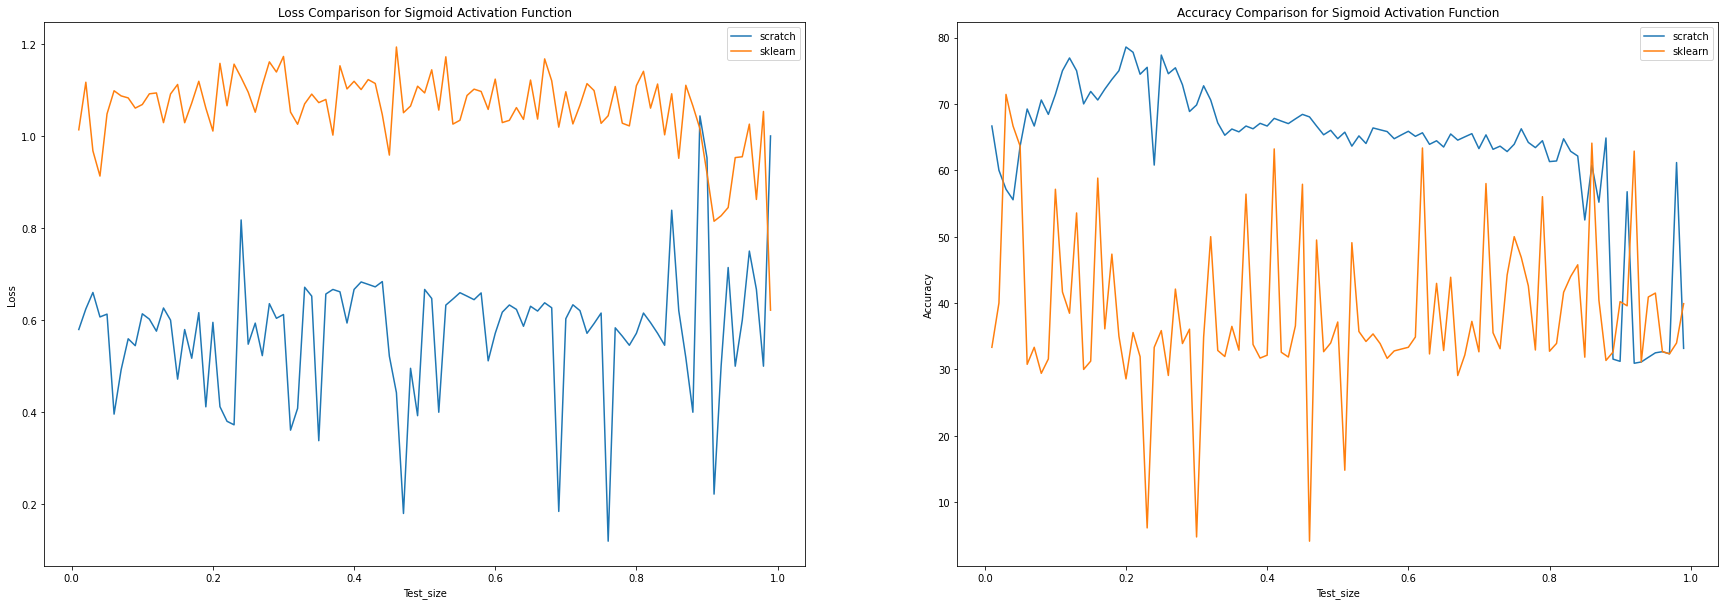

In [ ]:
f = plt.figure(figsize=(30,10))

ax = f.add_subplot(121)
plt.plot([i/100 for i in range(1,100)],best_loss_s)
plt.plot([i/100 for i in range(1,100)],best_loss_sk_s)
plt.xlabel('Test_size')
plt.ylabel('Loss')
plt.legend(labels = ['scratch','sklearn'])
plt.title('Loss Comparison for Sigmoid Activation Function')

ax = f.add_subplot(122)
plt.plot([i/100 for i in range(1,100)],scores_s_s)
plt.plot([i/100 for i in range(1,100)],scores_sk_s)
plt.xlabel('Test_size')
plt.ylabel('Accuracy')
plt.legend(labels = ['scratch','sklearn'])
plt.title('Accuracy Comparison for Sigmoid Activation Function')

plt.show()

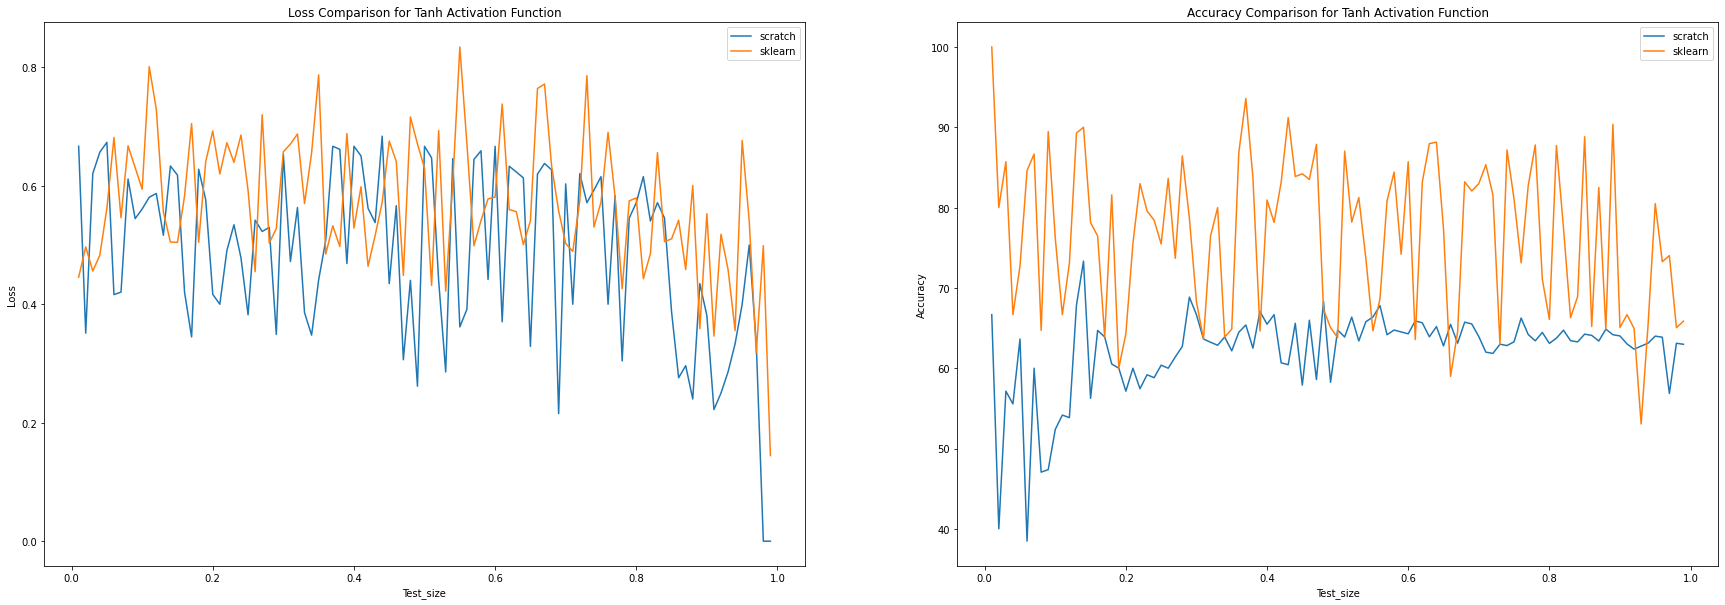

In [ ]:
f = plt.figure(figsize=(30,10))

ax = f.add_subplot(121)
plt.plot([i/100 for i in range(1,100)],best_loss_t)
plt.plot([i/100 for i in range(1,100)],best_loss_sk_t)
plt.xlabel('Test_size')
plt.ylabel('Loss')
plt.legend(labels = ['scratch','sklearn'])
plt.title('Loss Comparison for Tanh Activation Function')

ax = f.add_subplot(122)
plt.plot([i/100 for i in range(1,100)],scores_s_t)
plt.plot([i/100 for i in range(1,100)],scores_sk_t)
plt.xlabel('Test_size')
plt.ylabel('Accuracy')
plt.legend(labels = ['scratch','sklearn'])
plt.title('Accuracy Comparison for Tanh Activation Function')

plt.show()

# ***Question-2 (K-Means Clustering Implementations)*** 

Fetch MNIST Dataset for K-Means Implementations

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

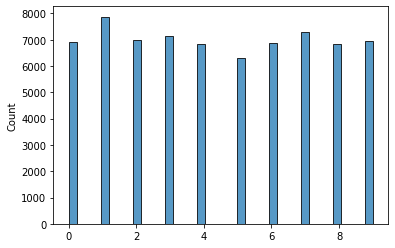

In [ ]:
y_df = pd.Series(mnist.target.astype('float64'))
sns.histplot(y_df)

Cluster Labelling on Sklearn's Implementation

In [ ]:
def retrieve_info(cluster_labels,y_train,model):
  
  reference_labels = {}
  for i in range(len(np.unique(model.labels_))):
    index = np.where(cluster_labels == i,1,0)
    num = np.bincount(y_train[index==1].astype('int64')).argmax()
    reference_labels[i] = num
  return reference_labels

Cluster Labelling on Scratch Implementation

In [ ]:
def retrieve_info_scratch(cluster_labels,y_train):
  
  reference_labels = {}
  for i in range(len(np.unique(cluster_labels))):
    index = np.where(cluster_labels == i,1,0)
    num = np.bincount(y_train[index==1].astype('int64')).argmax()
    reference_labels[i] = num
  return reference_labels

Vector Norm, equivalent to Euclidean Distance

In [ ]:
def calc_distance(X1, X2):
    return np.linalg.norm(X1-X2)

Assigning Data Points to Clusters

In [ ]:
def assign_clusters(centroids, cluster_array):
    clusters = []
    for i in range(cluster_array.shape[0]):
        distances = []
        for centroid in centroids:
            distances.append(calc_distance(centroid,cluster_array[i]))
        clusters.append(distances.index(min(distances)))
    return clusters

Calculating Centroids on newer iteration

In [ ]:
def calc_centroids(clusters, cluster_array):
    new_centroids = []
    cluster_df = pd.concat([pd.DataFrame(cluster_array),pd.DataFrame(clusters,columns=['cluster'])],axis=1)
    for c in set(cluster_df['cluster']):
        current_cluster = cluster_df[cluster_df['cluster']==c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

## **K-Means Clustering (Scratch Implementation)**

In [ ]:
x_sc = mnist.data
y_sc = mnist.target.astype('float64')
x_sc = x_sc / 255.0
xtrasc,xtessc,ytrasc,ytessc = train_test_split(x_sc,y_sc,test_size = 0.143,shuffle = True)
k1=10
k2=15
k3=20
number_of_rows = xtrasc.shape[0]
random_indices1 = np.random.choice(number_of_rows, size=k1, replace=False)
random_indices2 = np.random.choice(number_of_rows, size=k2, replace=False)
random_indices3 = np.random.choice(number_of_rows, size=k3, replace=False)
centroids1 = xtrasc[random_indices1, :]
centroids2 = xtrasc[random_indices2, :]
centroids3 = xtrasc[random_indices3, :]
clusters1 = assign_clusters(centroids1, xtrasc)
clusters2 = assign_clusters(centroids2, xtrasc)
clusters3 = assign_clusters(centroids3, xtrasc)
for i in range(10):
    centroids1 = calc_centroids(clusters1, xtrasc)
    clusters1 = assign_clusters(centroids1, xtrasc)
for ii in range(10):
    centroids2 = calc_centroids(clusters2, xtrasc)
    clusters2 = assign_clusters(centroids2, xtrasc)
for iii in range(10):
    centroids3 = calc_centroids(clusters3, xtrasc)
    clusters3 = assign_clusters(centroids3, xtrasc)
ref_sc1 = retrieve_info_scratch(np.array(clusters1),ytrasc)
ref_sc2 = retrieve_info_scratch(np.array(clusters2),ytrasc)
ref_sc3 = retrieve_info_scratch(np.array(clusters3),ytrasc)
predsc1 = assign_clusters(centroids1,xtessc)
predsc2 = assign_clusters(centroids2,xtessc)
predsc3 = assign_clusters(centroids3,xtessc)
nlsc1=[]
nlsc2=[]
nlsc3=[]
for i in range(len(predsc1)):
  nlsc1.append(ref_sc1[predsc1[i]])
for ii in range(len(predsc2)):
  nlsc2.append(ref_sc2[predsc2[ii]])
for iii in range(len(predsc3)):
  nlsc3.append(ref_sc3[predsc3[iii]])
clust_score_s_10 = accuracy_score(ytessc,nlsc1)
clust_score_s_15 = accuracy_score(ytessc,nlsc2)
clust_score_s_20 = accuracy_score(ytessc,nlsc3)

## **K-Means Clustering (Sklearn's Implementation)**

In [ ]:
x = mnist.data
y = mnist.target.astype('float64')
x = x/255.0
clust_score_sk_10 = []
clust_score_sk_15 = []
clust_score_sk_20 = []
xtra,xtes,ytra,ytes = train_test_split(x,y,test_size = 0.143,shuffle = True)
clust1 = KMeans(n_clusters = 10,n_jobs=-1,max_iter=10)
clust2 = KMeans(n_clusters = 15,n_jobs=-1,max_iter=10)
clust3 = KMeans(n_clusters = 20,n_jobs=-1,max_iter=10)
clust1.fit(xtra)
clust2.fit(xtra)
clust3.fit(xtra)
ref1 = retrieve_info(clust1.labels_,ytra,clust1)
ref2 = retrieve_info(clust2.labels_,ytra,clust2)
ref3 = retrieve_info(clust3.labels_,ytra,clust3)
pred1 = clust1.predict(xtes)
pred2 = clust2.predict(xtes)
pred3 = clust3.predict(xtes)
nl1=[]
nl2=[]
nl3=[]
for i in range(len(pred1)):
  nl1.append(ref1[pred1[i]])
for ii in range(len(pred2)):
  nl2.append(ref2[pred2[ii]])
for iii in range(len(pred3)):
  nl3.append(ref3[pred3[iii]])
clust_score_sk_10 = accuracy_score(ytes,nl1)
clust_score_sk_15 = accuracy_score(ytes,nl2)
clust_score_sk_20 = accuracy_score(ytes,nl3)

Accuracy Comparison for Scratch and Sklearn's Implementations

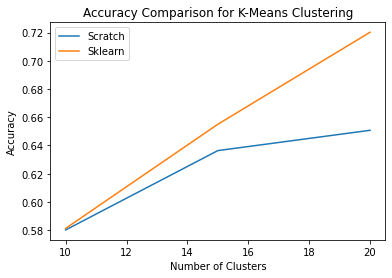

In [ ]:
scratch = [clust_score_s_10,clust_score_s_15,clust_score_s_20]
sk = [clust_score_sk_10,clust_score_sk_15,clust_score_sk_20]
nc = [10,15,20]

plt.plot(nc,scratch)
plt.plot(nc,sk)
plt.xlabel('Number of Clusters')
plt.ylabel('Accuracy')
plt.legend(labels = ['Scratch','Sklearn'])
plt.title('Accuracy Comparison for K-Means Clustering')

plt.show()

Plotting Centroids as the form of Images for Scratch v/s Sklearn

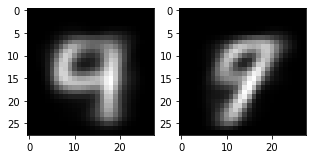

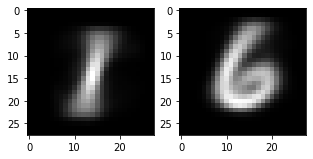

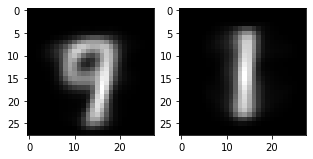

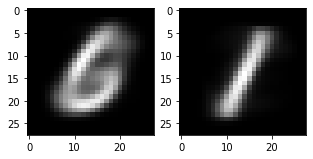

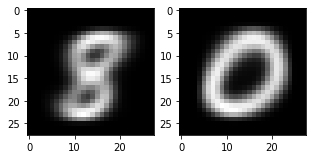

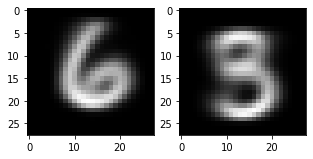

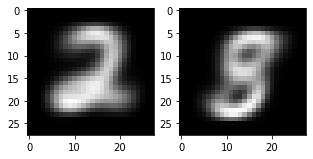

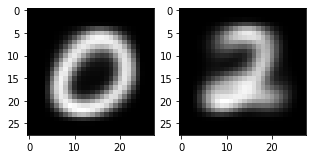

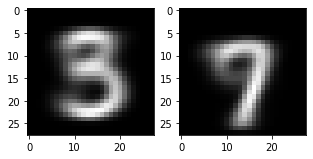

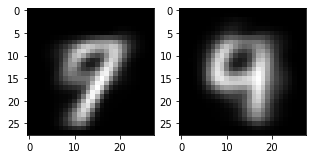

In [ ]:
for i in range(0,10):

  f = plt.figure(figsize=(5,5))
  
  ax = f.add_subplot(121)
  image = centroids1[i].to_numpy()
  final_image = image.reshape((28,28))
  plt.imshow(final_image, cmap='gray')

  ax = f.add_subplot(122)
  image = clust1.cluster_centers_[i,:]
  f_image = image.reshape((28,28))
  plt.imshow(f_image, cmap='gray')

  plt.show()

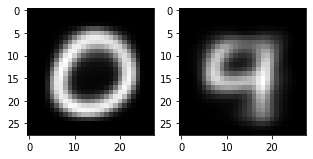

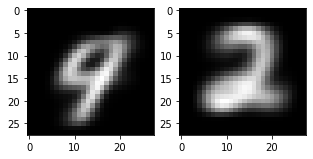

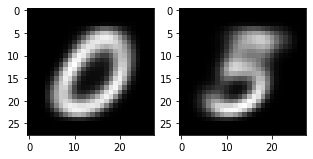

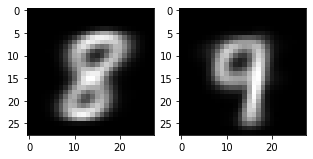

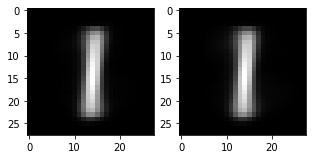

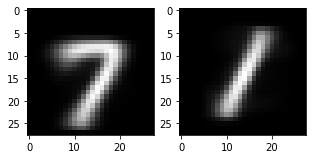

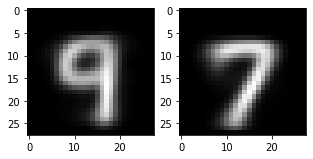

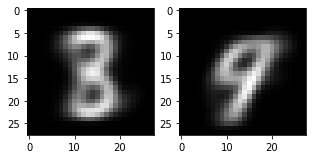

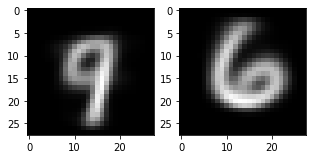

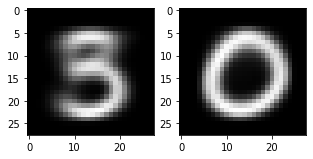

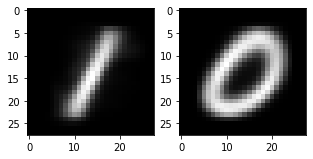

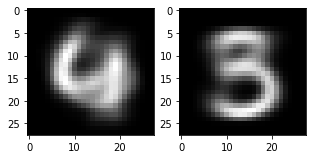

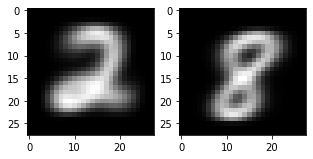

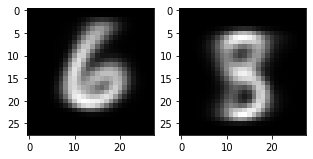

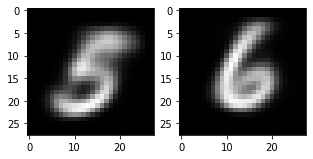

In [ ]:
for i in range(0,15):

  f = plt.figure(figsize=(5,5))
  
  ax = f.add_subplot(121)
  image = centroids2[i].to_numpy()
  final_image = image.reshape((28,28))
  plt.imshow(final_image, cmap='gray')

  ax = f.add_subplot(122)
  image = clust2.cluster_centers_[i,:]
  f_image = image.reshape((28,28))
  plt.imshow(f_image, cmap='gray')

  plt.show()

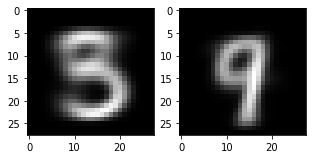

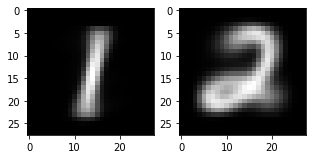

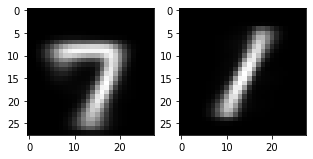

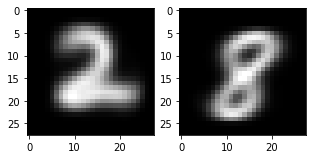

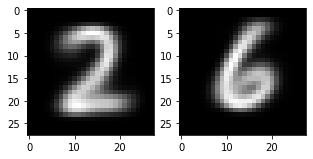

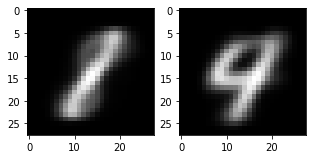

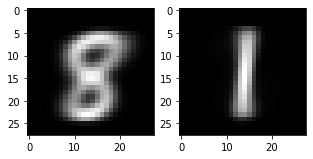

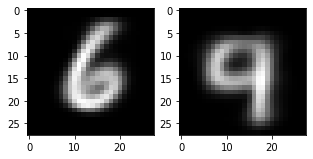

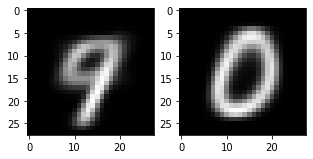

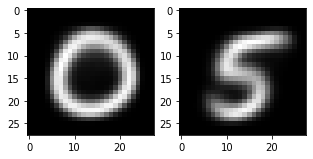

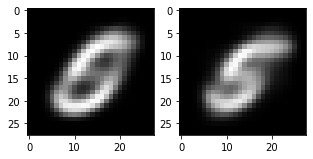

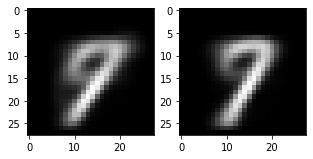

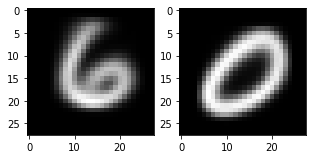

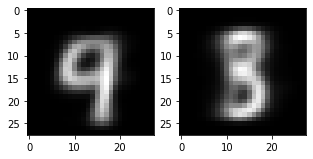

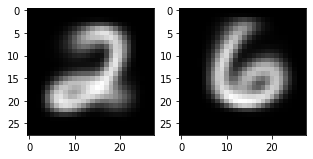

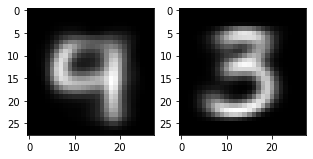

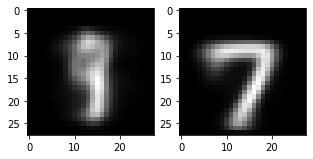

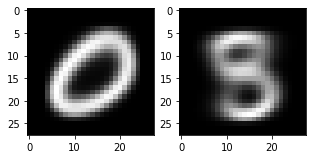

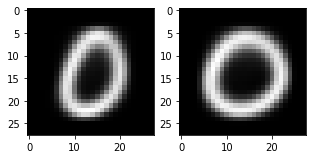

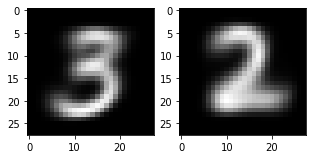

In [ ]:
for i in range(0,20):

  f = plt.figure(figsize=(5,5))
  
  ax = f.add_subplot(121)
  image = centroids3[i].to_numpy()
  final_image = image.reshape((28,28))
  plt.imshow(final_image, cmap='gray')

  ax = f.add_subplot(122)
  image = clust3.cluster_centers_[i,:]
  f_image = image.reshape((28,28))
  plt.imshow(f_image, cmap='gray')

  plt.show()

In [ ]:
print('Accuracy of Classification Task for scratch and sklearn implementations')
print('at k = 10')
print(str(clust_score_s_10*100)+'%',str(clust_score_sk_10*100)+'%')
print('at k = 15')
print(str(clust_score_s_15*100)+'%',str(clust_score_sk_15*100)+'%')
print('at k = 20')
print(str(clust_score_s_20*100)+'%',str(clust_score_sk_20*100)+'%')

Accuracy of Classification Task for scratch and sklearn implementations
at k = 10
58.01198801198802% 58.121878121878126%
at k = 15
63.63636363636363% 65.50449550449551%
at k = 20
65.07492507492508% 72.02797202797203%


# ***Question-3 (Neural Network Implementation through PyTorch)*** 

Dependencies

In [ ]:
import torch
import torchvision
from torchvision import datasets, transforms
from torch import nn, optim

Preprocessing Transforms to Image

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))])

MNIST Dataset, splitting into train and validation sets

In [ ]:
trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)
valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/train-images-idx3-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw




Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/train-labels-idx1-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/t10k-images-idx3-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/t10k-labels-idx1-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw

Processing...


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!
Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting PATH_TO_STORE_TESTSET/MNIST/raw/train-images-idx3-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw




Extracting PATH_TO_STORE_TESTSET/MNIST/raw/train-labels-idx1-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting PATH_TO_STORE_TESTSET/MNIST/raw/t10k-images-idx3-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting PATH_TO_STORE_TESTSET/MNIST/raw/t10k-labels-idx1-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw

Processing...
Done!


## **Performance Analysis on Neural Network with change in Number of Layers**

In [ ]:
input_size = 784
hidden_sizes1 = [392,392,392,392]
hidden_sizes2 = [392,392,392]
hidden_sizes3 = [392,392]
hidden_sizes4 = 392
output_size = 10

err11=[]
err12=[]
err13=[]
err14=[]

model1 = nn.Sequential(nn.Linear(input_size, hidden_sizes1[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes1[0], hidden_sizes1[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes1[1], hidden_sizes1[2]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes1[2], hidden_sizes1[3]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes1[3], output_size),
                      nn.LogSoftmax(dim=1))

model2 = nn.Sequential(nn.Linear(input_size, hidden_sizes2[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes2[0], hidden_sizes2[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes2[1], hidden_sizes2[2]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes2[2], output_size),
                      nn.LogSoftmax(dim=1))

model3 = nn.Sequential(nn.Linear(input_size, hidden_sizes3[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes3[0], hidden_sizes3[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes3[1], output_size),
                      nn.LogSoftmax(dim=1))

model4 = nn.Sequential(nn.Linear(input_size, hidden_sizes4),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes4, output_size),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer1 = optim.SGD(model1.parameters(), lr=0.003, momentum=0.9)
optimizer2 = optim.SGD(model2.parameters(), lr=0.003, momentum=0.9)
optimizer3 = optim.SGD(model3.parameters(), lr=0.003, momentum=0.9)
optimizer4 = optim.SGD(model4.parameters(), lr=0.003, momentum=0.9)

epochs = 15

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer1.zero_grad()
        
        output = model1(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer1.step()
        
        running_loss += loss.item()
    else:
        err11.append(running_loss/len(trainloader))
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))

print("\nModel-1 Done\n")

for f in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer2.zero_grad()
        
        output = model2(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer2.step()
        
        running_loss += loss.item()
    else:
        err12.append(running_loss/len(trainloader))
        print("Epoch {} - Training loss: {}".format(f, running_loss/len(trainloader)))

print("\nModel-2 Done\n")

for g in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer3.zero_grad()
        
        output = model3(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer3.step()
        
        running_loss += loss.item()
    else:
        err13.append(running_loss/len(trainloader))
        print("Epoch {} - Training loss: {}".format(g, running_loss/len(trainloader)))

print("\nModel-3 Done\n")

for h in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer4.zero_grad()
        
        output = model4(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer4.step()
        
        running_loss += loss.item()
    else:
        err14.append(running_loss/len(trainloader))
        print("Epoch {} - Training loss: {}".format(h, running_loss/len(trainloader)))

print("\nModel-4 Done\n")

correct_count1,correct_count2,correct_count3,correct_count4, all_count = 0,0,0,0,0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps1 = model1(img)
        logps2 = model2(img)
        logps3 = model3(img)
        logps4 = model4(img)

    ps1 = torch.exp(logps1)
    ps2 = torch.exp(logps2)
    ps3 = torch.exp(logps3)
    ps4 = torch.exp(logps4)

    probab1 = list(ps1.numpy()[0])
    probab2 = list(ps2.numpy()[0])
    probab3 = list(ps3.numpy()[0])
    probab4 = list(ps4.numpy()[0])

    pred_label1 = probab1.index(max(probab1))
    pred_label2 = probab2.index(max(probab2))
    pred_label3 = probab3.index(max(probab3))
    pred_label4 = probab4.index(max(probab4))

    true_label = labels.numpy()[i]
    if(true_label == pred_label1):
      correct_count1 += 1
    if(true_label == pred_label2):
      correct_count2 += 1
    if(true_label == pred_label3):
      correct_count3 += 1
    if(true_label == pred_label4):
      correct_count4 += 1
    all_count += 1

print("\nModel-1 Accuracy =", (correct_count1/all_count))
print("\nModel-2 Accuracy =", (correct_count2/all_count))
print("\nModel-3 Accuracy =", (correct_count3/all_count))
print("\nModel-4 Accuracy =", (correct_count4/all_count))

Epoch 0 - Training loss: 1.0408659232959057
Epoch 1 - Training loss: 0.28821865385815276
Epoch 2 - Training loss: 0.19216768381231503
Epoch 3 - Training loss: 0.14174022776946457
Epoch 4 - Training loss: 0.11745563783704727
Epoch 5 - Training loss: 0.09555577907337943
Epoch 6 - Training loss: 0.08158122714055872
Epoch 7 - Training loss: 0.07158946176605628
Epoch 8 - Training loss: 0.06253954193600492
Epoch 9 - Training loss: 0.05364996506765521
Epoch 10 - Training loss: 0.050786025293329276
Epoch 11 - Training loss: 0.04446782308048817
Epoch 12 - Training loss: 0.0390867134406001
Epoch 13 - Training loss: 0.03339946245142161
Epoch 14 - Training loss: 0.031139117614331364

Model-1 Done

Epoch 0 - Training loss: 0.7358979567218182
Epoch 1 - Training loss: 0.2658930154028795
Epoch 2 - Training loss: 0.19302330670286533
Epoch 3 - Training loss: 0.15084371364304125
Epoch 4 - Training loss: 0.12241086646564987
Epoch 5 - Training loss: 0.10057217142244837
Epoch 6 - Training loss: 0.0880473684

## **Performance analysis of Neural Network on changing Learning Rate**

In [ ]:
input_size = 784
hidden_sizes = [392,392,392,392]
output_size = 10

err21 = []
err22 = []
err23 = []
err24 = []

model11 = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[2], hidden_sizes[3]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[3], output_size),
                      nn.LogSoftmax(dim=1))

model12 = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[2], hidden_sizes[3]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[3], output_size),
                      nn.LogSoftmax(dim=1))

model13 = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[2], hidden_sizes[3]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[3], output_size),
                      nn.LogSoftmax(dim=1))

model14 = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[2], hidden_sizes[3]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[3], output_size),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer11 = optim.SGD(model11.parameters(), lr=0.0025, momentum=0.9)
optimizer12 = optim.SGD(model12.parameters(), lr=0.005, momentum=0.9)
optimizer13 = optim.SGD(model13.parameters(), lr=0.0075, momentum=0.9)
optimizer14 = optim.SGD(model14.parameters(), lr=0.01, momentum=0.9)

epochs = 15

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer11.zero_grad()
        
        output = model11(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer11.step()
        
        running_loss += loss.item()
    else:
        err21.append(running_loss/len(trainloader))
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))

print("\nModel-1 Done\n")

for f in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer12.zero_grad()
        
        output = model12(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer12.step()
        
        running_loss += loss.item()
    else:
        err22.append(running_loss/len(trainloader))
        print("Epoch {} - Training loss: {}".format(f, running_loss/len(trainloader)))

print("\nModel-2 Done\n")

for g in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer13.zero_grad()
        
        output = model13(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer13.step()
        
        running_loss += loss.item()
    else:
        err23.append(running_loss/len(trainloader))
        print("Epoch {} - Training loss: {}".format(g, running_loss/len(trainloader)))

print("\nModel-3 Done\n")

for h in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer14.zero_grad()
        
        output = model14(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer14.step()
        
        running_loss += loss.item()
    else:
        err24.append(running_loss/len(trainloader))
        print("Epoch {} - Training loss: {}".format(h, running_loss/len(trainloader)))

print("\nModel-4 Done\n")

correct_count11,correct_count12,correct_count13,correct_count14, all_count1 = 0,0,0,0,0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps11 = model11(img)
        logps12 = model12(img)
        logps13 = model13(img)
        logps14 = model14(img)

    ps11 = torch.exp(logps11)
    ps12 = torch.exp(logps12)
    ps13 = torch.exp(logps13)
    ps14 = torch.exp(logps14)

    probab11 = list(ps11.numpy()[0])
    probab12 = list(ps12.numpy()[0])
    probab13 = list(ps13.numpy()[0])
    probab14 = list(ps14.numpy()[0])

    pred_label11 = probab11.index(max(probab11))
    pred_label12 = probab12.index(max(probab12))
    pred_label13 = probab13.index(max(probab13))
    pred_label14 = probab14.index(max(probab14))

    true_label = labels.numpy()[i]
    if(true_label == pred_label11):
      correct_count11 += 1
    if(true_label == pred_label12):
      correct_count12 += 1
    if(true_label == pred_label13):
      correct_count13 += 1
    if(true_label == pred_label14):
      correct_count14 += 1
    all_count1 += 1

print("\nModel-1 Accuracy =", (correct_count11/all_count1))
print("\nModel-2 Accuracy =", (correct_count12/all_count1))
print("\nModel-3 Accuracy =", (correct_count13/all_count1))
print("\nModel-4 Accuracy =", (correct_count14/all_count1))

Epoch 0 - Training loss: 1.117165119599686
Epoch 1 - Training loss: 0.3115584380479891
Epoch 2 - Training loss: 0.21841047996921198
Epoch 3 - Training loss: 0.16264766091897861
Epoch 4 - Training loss: 0.13165591417281614
Epoch 5 - Training loss: 0.10692636998417948
Epoch 6 - Training loss: 0.09307293447135671
Epoch 7 - Training loss: 0.08075531136725089
Epoch 8 - Training loss: 0.07164307249593797
Epoch 9 - Training loss: 0.06407417365928679
Epoch 10 - Training loss: 0.056572885553378346
Epoch 11 - Training loss: 0.05006747646207637
Epoch 12 - Training loss: 0.04387418794180594
Epoch 13 - Training loss: 0.04050457788577208
Epoch 14 - Training loss: 0.034421668065387184

Model-1 Done

Epoch 0 - Training loss: 0.7578848240805715
Epoch 1 - Training loss: 0.21639539252942813
Epoch 2 - Training loss: 0.1451789479611366
Epoch 3 - Training loss: 0.11084676096374706
Epoch 4 - Training loss: 0.08876690186554197
Epoch 5 - Training loss: 0.07623957017653071
Epoch 6 - Training loss: 0.06580968685

## **Performance Analysis on Neural Network while changing Momentum**

In [ ]:
input_size = 784
hidden_sizes = [392,392,392,392]
output_size = 10

err31=[]
err32=[]
err33=[]
err34=[]

model21 = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[2], hidden_sizes[3]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[3], output_size),
                      nn.LogSoftmax(dim=1))

model22 = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[2], hidden_sizes[3]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[3], output_size),
                      nn.LogSoftmax(dim=1))

model23 = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[2], hidden_sizes[3]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[3], output_size),
                      nn.LogSoftmax(dim=1))

model24 = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[2], hidden_sizes[3]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[3], output_size),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer21 = optim.SGD(model21.parameters(), lr=0.003, momentum=0.7)
optimizer22 = optim.SGD(model22.parameters(), lr=0.003, momentum=0.75)
optimizer23 = optim.SGD(model23.parameters(), lr=0.003, momentum=0.8)
optimizer24 = optim.SGD(model24.parameters(), lr=0.003, momentum=0.85)

epochs = 15

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer21.zero_grad()
        
        output = model21(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer21.step()
        
        running_loss += loss.item()
    else:
        err31.append(running_loss/len(trainloader))
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))

print("\nModel-1 Done\n")

for f in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer22.zero_grad()
        
        output = model22(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer22.step()
        
        running_loss += loss.item()
    else:
        err32.append(running_loss/len(trainloader))
        print("Epoch {} - Training loss: {}".format(f, running_loss/len(trainloader)))

print("\nModel-2 Done\n")

for g in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer23.zero_grad()
        
        output = model23(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer23.step()
        
        running_loss += loss.item()
    else:
        err33.append(running_loss/len(trainloader))
        print("Epoch {} - Training loss: {}".format(g, running_loss/len(trainloader)))

print("\nModel-3 Done\n")

for h in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer24.zero_grad()
        
        output = model24(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer24.step()
        
        running_loss += loss.item()
    else:
        err34.append(running_loss/len(trainloader))
        print("Epoch {} - Training loss: {}".format(h, running_loss/len(trainloader)))

print("\nModel-4 Done\n")

correct_count21,correct_count22,correct_count23,correct_count24, all_count2 = 0,0,0,0,0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps21 = model21(img)
        logps22 = model22(img)
        logps23 = model23(img)
        logps24 = model24(img)

    ps21 = torch.exp(logps21)
    ps22 = torch.exp(logps22)
    ps23 = torch.exp(logps23)
    ps24 = torch.exp(logps24)

    probab21 = list(ps21.numpy()[0])
    probab22 = list(ps22.numpy()[0])
    probab23 = list(ps23.numpy()[0])
    probab24 = list(ps24.numpy()[0])

    pred_label21 = probab21.index(max(probab21))
    pred_label22 = probab22.index(max(probab22))
    pred_label23 = probab23.index(max(probab23))
    pred_label24 = probab24.index(max(probab24))

    true_label = labels.numpy()[i]
    if(true_label == pred_label21):
      correct_count21 += 1
    if(true_label == pred_label22):
      correct_count22 += 1
    if(true_label == pred_label23):
      correct_count23 += 1
    if(true_label == pred_label24):
      correct_count24 += 1
    all_count2 += 1

print("\nModel-1 Accuracy =", (correct_count21/all_count2))
print("\nModel-2 Accuracy =", (correct_count22/all_count2))
print("\nModel-3 Accuracy =", (correct_count23/all_count2))
print("\nModel-4 Accuracy =", (correct_count24/all_count2))

Epoch 0 - Training loss: 1.9546419598781732
Epoch 1 - Training loss: 0.563504968513685
Epoch 2 - Training loss: 0.36886023729245293
Epoch 3 - Training loss: 0.30610802707705165
Epoch 4 - Training loss: 0.26317802120023953
Epoch 5 - Training loss: 0.22625459493525119
Epoch 6 - Training loss: 0.19436660172270814
Epoch 7 - Training loss: 0.16891813354054366
Epoch 8 - Training loss: 0.1486323738573933
Epoch 9 - Training loss: 0.1327689553656653
Epoch 10 - Training loss: 0.11854656651489008
Epoch 11 - Training loss: 0.1071345111234054
Epoch 12 - Training loss: 0.09690479155995253
Epoch 13 - Training loss: 0.08859890250505002
Epoch 14 - Training loss: 0.08164288781519764

Model-1 Done

Epoch 0 - Training loss: 1.77716500291438
Epoch 1 - Training loss: 0.48649457973966215
Epoch 2 - Training loss: 0.3315285352676281
Epoch 3 - Training loss: 0.2731943182758431
Epoch 4 - Training loss: 0.22543307650349795
Epoch 5 - Training loss: 0.18899367873602585
Epoch 6 - Training loss: 0.16007672039978604
E

## **Performance Analysis on Neural Network while changing the Number of Neurons**

In [ ]:
input_size = 784
hidden_sizes1 = [392,392,392,392]
hidden_sizes2 = [196,196,196,196]
hidden_sizes3 = [98,98,98,98]
hidden_sizes4 = [49,49,49,49]
output_size = 10

err41=[]
err42=[]
err43=[]
err44=[]

model31 = nn.Sequential(nn.Linear(input_size, hidden_sizes1[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes1[0], hidden_sizes1[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes1[1], hidden_sizes1[2]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes1[2], hidden_sizes1[3]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes1[3], output_size),
                      nn.LogSoftmax(dim=1))

model32 = nn.Sequential(nn.Linear(input_size, hidden_sizes2[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes2[0], hidden_sizes2[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes2[1], hidden_sizes2[2]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes2[2], hidden_sizes2[3]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes2[3], output_size),
                      nn.LogSoftmax(dim=1))

model33 = nn.Sequential(nn.Linear(input_size, hidden_sizes3[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes3[0], hidden_sizes3[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes3[1], hidden_sizes3[2]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes3[2], hidden_sizes3[3]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes3[3], output_size),
                      nn.LogSoftmax(dim=1))

model34 = nn.Sequential(nn.Linear(input_size, hidden_sizes4[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes4[0], hidden_sizes4[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes4[1], hidden_sizes4[2]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes4[2], hidden_sizes4[3]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes4[3], output_size),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer31 = optim.SGD(model31.parameters(), lr=0.003, momentum=0.9)
optimizer32 = optim.SGD(model32.parameters(), lr=0.003, momentum=0.9)
optimizer33 = optim.SGD(model33.parameters(), lr=0.003, momentum=0.9)
optimizer34 = optim.SGD(model34.parameters(), lr=0.003, momentum=0.9)

epochs = 15

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer31.zero_grad()
        
        output = model31(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer31.step()
        
        running_loss += loss.item()
    else:
        err41.append(running_loss/len(trainloader))
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))

print("\nModel-1 Done\n")

for f in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer32.zero_grad()
        
        output = model32(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer32.step()
        
        running_loss += loss.item()
    else:
        err42.append(running_loss/len(trainloader))
        print("Epoch {} - Training loss: {}".format(f, running_loss/len(trainloader)))

print("\nModel-2 Done\n")

for g in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer33.zero_grad()
        
        output = model33(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer33.step()
        
        running_loss += loss.item()
    else:
        err43.append(running_loss/len(trainloader))
        print("Epoch {} - Training loss: {}".format(g, running_loss/len(trainloader)))

print("\nModel-3 Done\n")

for h in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer34.zero_grad()
        
        output = model34(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer34.step()
        
        running_loss += loss.item()
    else:
        err44.append(running_loss/len(trainloader))
        print("Epoch {} - Training loss: {}".format(h, running_loss/len(trainloader)))

print("\nModel-4 Done\n")

correct_count31,correct_count32,correct_count33,correct_count34, all_count3 = 0,0,0,0,0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps31 = model31(img)
        logps32 = model32(img)
        logps33 = model33(img)
        logps34 = model34(img)

    ps31 = torch.exp(logps31)
    ps32 = torch.exp(logps32)
    ps33 = torch.exp(logps33)
    ps34 = torch.exp(logps34)

    probab31 = list(ps31.numpy()[0])
    probab32 = list(ps32.numpy()[0])
    probab33 = list(ps33.numpy()[0])
    probab34 = list(ps34.numpy()[0])

    pred_label31 = probab31.index(max(probab31))
    pred_label32 = probab32.index(max(probab32))
    pred_label33 = probab33.index(max(probab33))
    pred_label34 = probab34.index(max(probab34))

    true_label = labels.numpy()[i]
    if(true_label == pred_label31):
      correct_count31 += 1
    if(true_label == pred_label32):
      correct_count32 += 1
    if(true_label == pred_label33):
      correct_count33 += 1
    if(true_label == pred_label34):
      correct_count34 += 1
    all_count3 += 1

print("\nModel-1 Accuracy =", (correct_count31/all_count3))
print("\nModel-2 Accuracy =", (correct_count32/all_count3))
print("\nModel-3 Accuracy =", (correct_count33/all_count3))
print("\nModel-4 Accuracy =", (correct_count34/all_count3))

Epoch 0 - Training loss: 1.0636352208345683
Epoch 1 - Training loss: 0.30002699752669854
Epoch 2 - Training loss: 0.19865486732741663
Epoch 3 - Training loss: 0.1453277477686768
Epoch 4 - Training loss: 0.11656083501597393
Epoch 5 - Training loss: 0.09822334807767256
Epoch 6 - Training loss: 0.08421983494997215
Epoch 7 - Training loss: 0.07109062690689945
Epoch 8 - Training loss: 0.06247175112887939
Epoch 9 - Training loss: 0.055051621218184146
Epoch 10 - Training loss: 0.04985186739711524
Epoch 11 - Training loss: 0.044026491047912786
Epoch 12 - Training loss: 0.03724424723599817
Epoch 13 - Training loss: 0.03559227548301347
Epoch 14 - Training loss: 0.030583788961808044

Model-1 Done

Epoch 0 - Training loss: 1.0684945770005174
Epoch 1 - Training loss: 0.3039504717439731
Epoch 2 - Training loss: 0.21231110529430003
Epoch 3 - Training loss: 0.16037144420394447
Epoch 4 - Training loss: 0.12662100277022956
Epoch 5 - Training loss: 0.1079995479615433
Epoch 6 - Training loss: 0.0926377069

## **Performance Analysis on Neural Network while changing Loss Function**

In [ ]:
input_size = 784
hidden_sizes1 = [392,392,392,392]
hidden_sizes2 = [392,392,392,392]
output_size = 10

err51=[]
err52=[]

model41 = nn.Sequential(nn.Linear(input_size, hidden_sizes1[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes1[0], hidden_sizes1[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes1[1], hidden_sizes1[2]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes1[2], hidden_sizes1[3]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes1[3], output_size),
                      nn.LogSoftmax(dim=1))

model42 = nn.Sequential(nn.Linear(input_size, hidden_sizes2[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes2[0], hidden_sizes2[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes2[1], hidden_sizes2[2]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes2[2], hidden_sizes2[3]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes2[3], output_size),
                      nn.LogSoftmax(dim=1))

criterion1 = nn.CrossEntropyLoss()
criterion2 = nn.NLLLoss()

optimizer41 = optim.SGD(model41.parameters(), lr=0.003, momentum=0.9)
optimizer42 = optim.SGD(model42.parameters(), lr=0.003, momentum=0.9)
epochs = 15

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer41.zero_grad()
        
        output = model41(images)
        loss = criterion1(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer41.step()
        
        running_loss += loss.item()
    else:
        err51.append(running_loss/len(trainloader))
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))

print("\nModel-1 Done\n")

for f in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer42.zero_grad()
        
        output = model42(images)
        loss = criterion2(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer42.step()
        
        running_loss += loss.item()
    else:
        err52.append(running_loss/len(trainloader))
        print("Epoch {} - Training loss: {}".format(f, running_loss/len(trainloader)))

print("\nModel-2 Done\n")

correct_count41,correct_count42,all_count4 = 0,0,0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps41 = model41(img)
        logps42 = model42(img)

    ps41 = torch.exp(logps41)
    ps42 = torch.exp(logps42)

    probab41 = list(ps41.numpy()[0])
    probab42 = list(ps42.numpy()[0])

    pred_label41 = probab41.index(max(probab41))
    pred_label42 = probab42.index(max(probab42))

    true_label = labels.numpy()[i]
    if(true_label == pred_label41):
      correct_count41 += 1
    if(true_label == pred_label42):
      correct_count42 += 1
    all_count4 += 1

print("\nModel-1 Accuracy =", (correct_count41/all_count4))
print("\nModel-2 Accuracy =", (correct_count42/all_count4))

Epoch 0 - Training loss: 1.009123553440515
Epoch 1 - Training loss: 0.29127320629764974
Epoch 2 - Training loss: 0.1974939871142541
Epoch 3 - Training loss: 0.14686152788359663
Epoch 4 - Training loss: 0.11965412479529439
Epoch 5 - Training loss: 0.09839990689282192
Epoch 6 - Training loss: 0.08184263055750937
Epoch 7 - Training loss: 0.07431938180149888
Epoch 8 - Training loss: 0.062399003604577896
Epoch 9 - Training loss: 0.05433737723043125
Epoch 10 - Training loss: 0.05012766863661272
Epoch 11 - Training loss: 0.043923032960220515
Epoch 12 - Training loss: 0.03678619759398074
Epoch 13 - Training loss: 0.03411817627905338
Epoch 14 - Training loss: 0.031249737767413306

Model-1 Done

Epoch 0 - Training loss: 1.0301299806056754
Epoch 1 - Training loss: 0.2944524704393293
Epoch 2 - Training loss: 0.19682653001281245
Epoch 3 - Training loss: 0.14540422925634233
Epoch 4 - Training loss: 0.11534623572352662
Epoch 5 - Training loss: 0.09800016900240532
Epoch 6 - Training loss: 0.0844723410

## **Performance Analysis on Neural Network while changing Number of Epochs**

In [ ]:
input_size = 784
hidden_sizes = [392,392,392,392]
output_size = 10

err61=[]
err62=[]
err63=[]
err64=[]

model51 = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[2], hidden_sizes[3]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[3], output_size),
                      nn.LogSoftmax(dim=1))

model52 = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[2], hidden_sizes[3]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[3], output_size),
                      nn.LogSoftmax(dim=1))

model53 = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[2], hidden_sizes[3]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[3], output_size),
                      nn.LogSoftmax(dim=1))

model54 = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[2], hidden_sizes[3]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[3], output_size),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer51 = optim.SGD(model51.parameters(), lr=0.003, momentum=0.9)
optimizer52 = optim.SGD(model52.parameters(), lr=0.003, momentum=0.9)
optimizer53 = optim.SGD(model53.parameters(), lr=0.003, momentum=0.9)
optimizer54 = optim.SGD(model54.parameters(), lr=0.003, momentum=0.9)

epochs1 = 5
epochs2 = 10
epochs3 = 15
epochs4 = 20

for e in range(epochs1):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer51.zero_grad()
        
        output = model51(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer51.step()
        
        running_loss += loss.item()
    else:
        err61.append(running_loss/len(trainloader))
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))

print("\nModel-1 Done\n")

for f in range(epochs2):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer52.zero_grad()
        
        output = model52(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer52.step()
        
        running_loss += loss.item()
    else:
        err62.append(running_loss/len(trainloader))
        print("Epoch {} - Training loss: {}".format(f, running_loss/len(trainloader)))

print("\nModel-2 Done\n")

for g in range(epochs3):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer53.zero_grad()
        
        output = model53(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer53.step()
        
        running_loss += loss.item()
    else:
        err63.append(running_loss/len(trainloader))
        print("Epoch {} - Training loss: {}".format(g, running_loss/len(trainloader)))

print("\nModel-3 Done\n")

for h in range(epochs4):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer54.zero_grad()
        
        output = model54(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer54.step()
        
        running_loss += loss.item()
    else:
        err64.append(running_loss/len(trainloader))
        print("Epoch {} - Training loss: {}".format(h, running_loss/len(trainloader)))

print("\nModel-4 Done\n")

correct_count51,correct_count52,correct_count53,correct_count54, all_count5 = 0,0,0,0,0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps51 = model51(img)
        logps52 = model52(img)
        logps53 = model53(img)
        logps54 = model54(img)

    ps51 = torch.exp(logps51)
    ps52 = torch.exp(logps52)
    ps53 = torch.exp(logps53)
    ps54 = torch.exp(logps54)

    probab51 = list(ps51.numpy()[0])
    probab52 = list(ps52.numpy()[0])
    probab53 = list(ps53.numpy()[0])
    probab54 = list(ps54.numpy()[0])

    pred_label51 = probab51.index(max(probab51))
    pred_label52 = probab52.index(max(probab52))
    pred_label53 = probab53.index(max(probab53))
    pred_label54 = probab54.index(max(probab54))

    true_label = labels.numpy()[i]
    if(true_label == pred_label51):
      correct_count51 += 1
    if(true_label == pred_label52):
      correct_count52 += 1
    if(true_label == pred_label53):
      correct_count53 += 1
    if(true_label == pred_label54):
      correct_count54 += 1
    all_count5 += 1

print("\nModel-1 Accuracy =", (correct_count51/all_count5))
print("\nModel-2 Accuracy =", (correct_count52/all_count5))
print("\nModel-3 Accuracy =", (correct_count53/all_count5))
print("\nModel-4 Accuracy =", (correct_count54/all_count5))

Epoch 0 - Training loss: 1.0211230547888193
Epoch 1 - Training loss: 0.2829818927935128
Epoch 2 - Training loss: 0.19160456705226828
Epoch 3 - Training loss: 0.14261538889616537
Epoch 4 - Training loss: 0.11717765407958455

Model-1 Done

Epoch 0 - Training loss: 1.0518050233343008
Epoch 1 - Training loss: 0.28763688282608224
Epoch 2 - Training loss: 0.19081309135915883
Epoch 3 - Training loss: 0.1437981581784038
Epoch 4 - Training loss: 0.11428273056468952
Epoch 5 - Training loss: 0.09574189793064332
Epoch 6 - Training loss: 0.07983480696740157
Epoch 7 - Training loss: 0.07043353757405998
Epoch 8 - Training loss: 0.061444060181576346
Epoch 9 - Training loss: 0.05540546758494068

Model-2 Done

Epoch 0 - Training loss: 1.0101213758942416
Epoch 1 - Training loss: 0.28731243097499365
Epoch 2 - Training loss: 0.19299504526062752
Epoch 3 - Training loss: 0.14437270192488996
Epoch 4 - Training loss: 0.11589623182646629
Epoch 5 - Training loss: 0.09849697738282208
Epoch 6 - Training loss: 0.08

Necessary Loss and Accuracy Curves for observing changes in Parameters

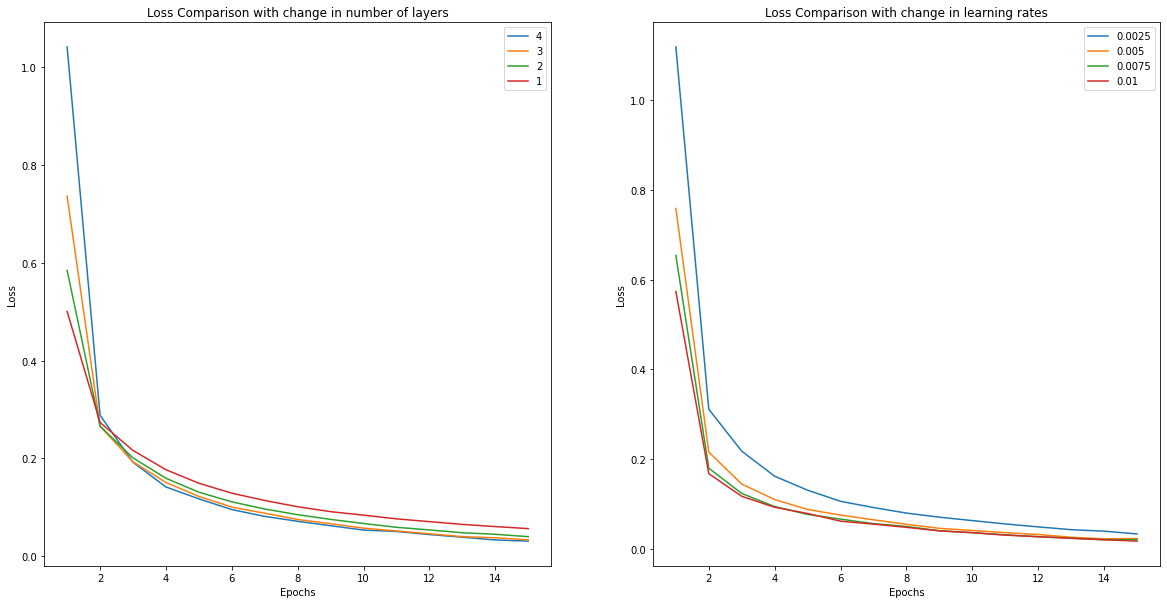

In [ ]:
f = plt.figure(figsize=(20,10))

ax = f.add_subplot(121)
plt.plot([i for i in range(1,16)],err11)
plt.plot([i for i in range(1,16)],err12)
plt.plot([i for i in range(1,16)],err13)
plt.plot([i for i in range(1,16)],err14)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(labels = ['4','3','2','1'])
plt.title('Loss Comparison with change in number of layers')

ax = f.add_subplot(122)
plt.plot([i for i in range(1,16)],err21)
plt.plot([i for i in range(1,16)],err22)
plt.plot([i for i in range(1,16)],err23)
plt.plot([i for i in range(1,16)],err24)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(labels = ['0.0025','0.005','0.0075','0.01'])
plt.title('Loss Comparison with change in learning rates')

plt.show()

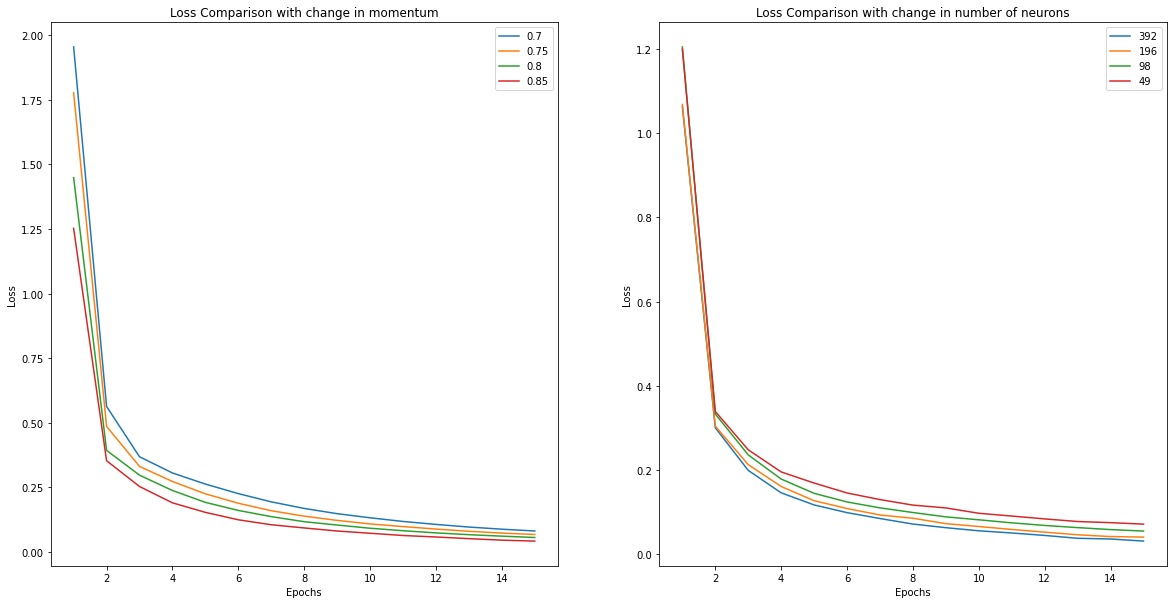

In [ ]:
f = plt.figure(figsize=(20,10))

ax = f.add_subplot(121)
plt.plot([i for i in range(1,16)],err31)
plt.plot([i for i in range(1,16)],err32)
plt.plot([i for i in range(1,16)],err33)
plt.plot([i for i in range(1,16)],err34)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(labels = ['0.7','0.75','0.8','0.85'])
plt.title('Loss Comparison with change in momentum')

ax = f.add_subplot(122)
plt.plot([i for i in range(1,16)],err41)
plt.plot([i for i in range(1,16)],err42)
plt.plot([i for i in range(1,16)],err43)
plt.plot([i for i in range(1,16)],err44)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(labels = ['392','196','98','49'])
plt.title('Loss Comparison with change in number of neurons')

plt.show()

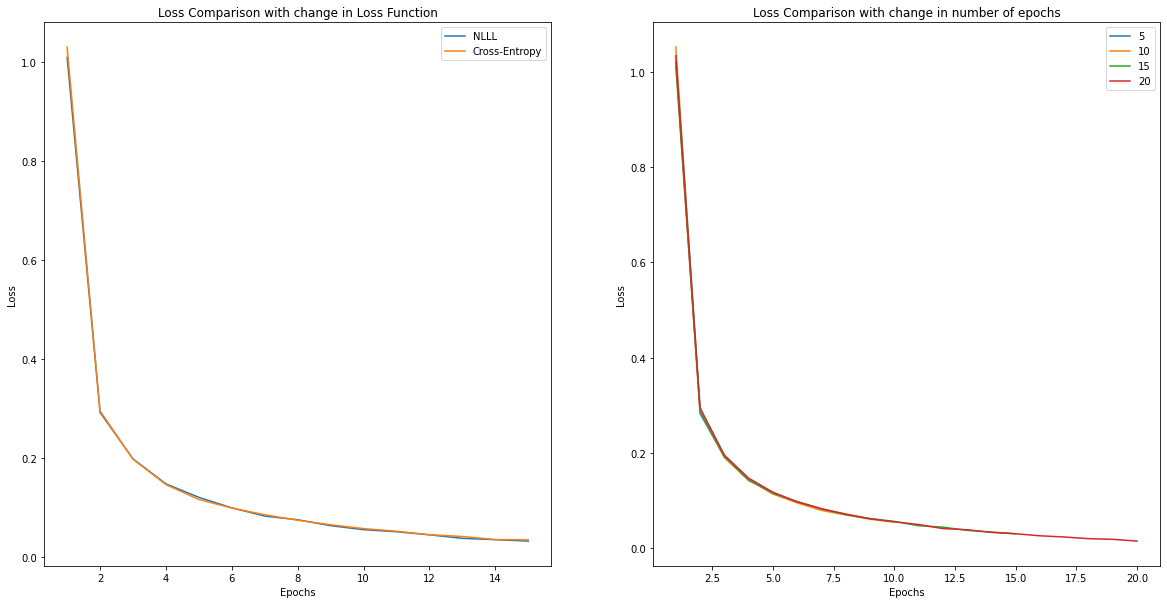

In [ ]:
f = plt.figure(figsize=(20,10))

ax = f.add_subplot(121)
plt.plot([i for i in range(1,16)],err51)
plt.plot([i for i in range(1,16)],err52)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(labels = ['NLLL','Cross-Entropy'])
plt.title('Loss Comparison with change in Loss Function')

ax = f.add_subplot(122)
plt.plot([i for i in range(1,6)],err61)
plt.plot([i for i in range(1,11)],err62)
plt.plot([i for i in range(1,16)],err63)
plt.plot([i for i in range(1,21)],err64)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(labels = ['5','10','15','20'])
plt.title('Loss Comparison with change in number of epochs')

plt.show()

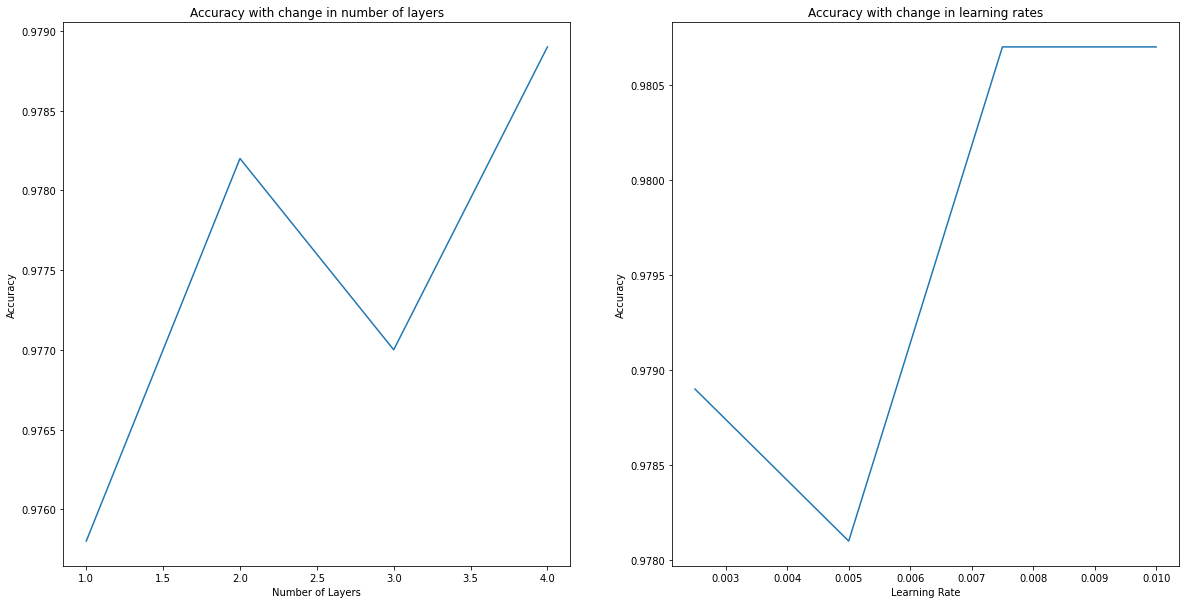

In [ ]:
f = plt.figure(figsize=(20,10))

ax = f.add_subplot(121)
plt.plot([4,3,2,1],[(correct_count1/all_count),(correct_count2/all_count),(correct_count3/all_count),(correct_count4/all_count)])
plt.xlabel('Number of Layers')
plt.ylabel('Accuracy')
plt.title('Accuracy with change in number of layers')

ax = f.add_subplot(122)
plt.plot([0.0025,0.005,0.0075,0.01],[(correct_count11/all_count1),(correct_count12/all_count1),(correct_count13/all_count1),(correct_count14/all_count1)])
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Accuracy with change in learning rates')

plt.show()

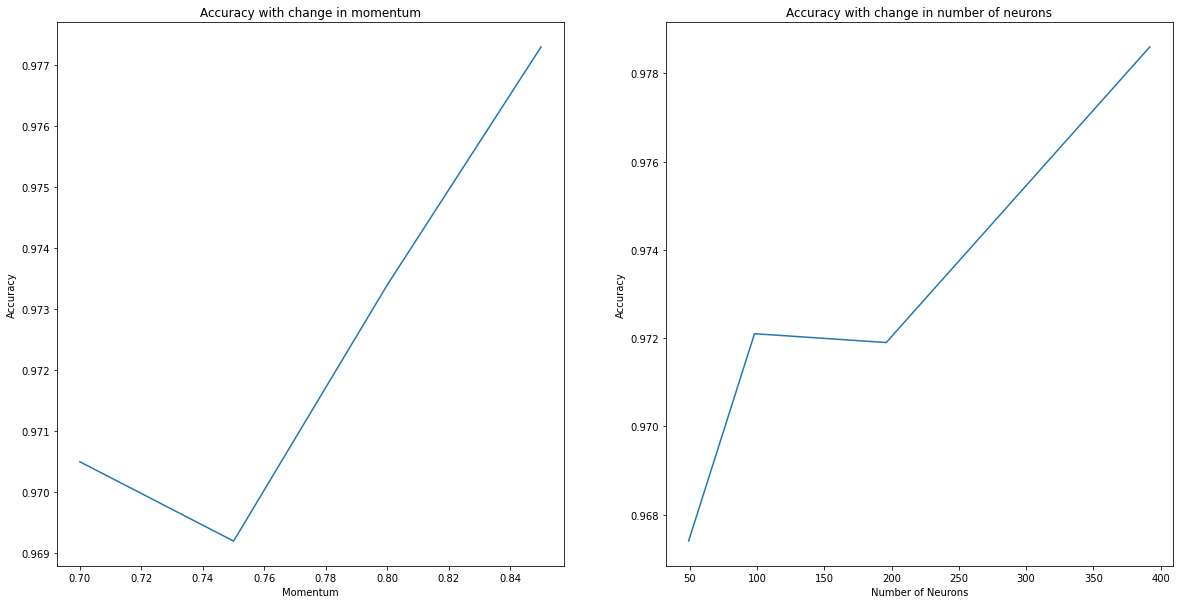

In [ ]:
f = plt.figure(figsize=(20,10))

ax = f.add_subplot(121)
plt.plot([0.7,0.75,0.8,0.85],[(correct_count21/all_count2),(correct_count22/all_count2),(correct_count23/all_count2),(correct_count24/all_count2)])
plt.xlabel('Momentum')
plt.ylabel('Accuracy')
plt.title('Accuracy with change in momentum')

ax = f.add_subplot(122)
plt.plot([392,196,98,49],[(correct_count31/all_count3),(correct_count32/all_count3),(correct_count33/all_count3),(correct_count34/all_count3)])
plt.xlabel('Number of Neurons')
plt.ylabel('Accuracy')
plt.title('Accuracy with change in number of neurons')

plt.show()

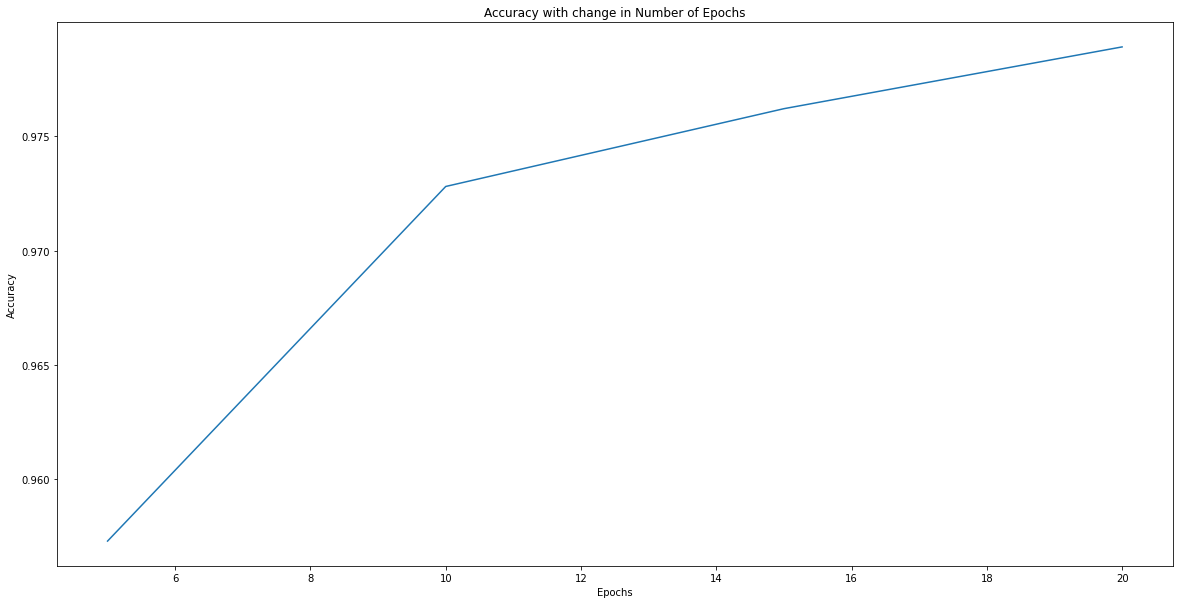

In [ ]:
f = plt.figure(figsize=(20,10))

plt.plot([5,10,15,20],[(correct_count51/all_count5),(correct_count52/all_count5),(correct_count53/all_count5),(correct_count54/all_count5)])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy with change in Number of Epochs')

plt.show()

In [ ]:
print('NLLL :- '+str(correct_count41*100/all_count4)+'%')
print('Cross Entropy :- '+str(correct_count42*100/all_count4)+'%')

NLLL :- 98.1%
Cross Entropy :- 97.85%
